![](_fig/labeled.jpg)

![](attachment:_fig/labeled.jpg)

# PyStudio 1: Learning the Basics

## Finding Value: Predicting Performance on Value Based Payments from CMS Hospital Compare Data

### Setup Workspace

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
import scipy.stats as st
import matplotlib.pyplot as plt

In [4]:
os.chdir("/home/drewc/allocativ/py4hc")

In [5]:
df_cms = pd.read_csv("_data/cms.csv")

In [6]:
df_cms.info()
df_cms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 178 entries, Facility ID to Track Electronic Labs
dtypes: float64(152), int64(25), object(1)
memory usage: 3.1+ MB


,Facility ID,FIPS,2018 VBP Adjustment Factor,2019 VBP Adjustment Factor,2020 VBP Adjustment Factor,READM-30-AMI-HRRP,READM-30-CABG-HRRP,READM-30-COPD-HRRP,READM-30-HF-HRRP,READM-30-HIP-KNEE-HRRP,...,Efficient use of medical imaging national comparison Above Average,Mortality national comparison Below Average,Safety of care national comparison Below Average,Readmission national comparison Below Average,Patient experience national comparison Below Average,Effectiveness of care national comparison Below Average,Timeliness of care national comparison Below Average,Efficient use of medical imaging national comparison Below Average,Receive Electronic Labs,Track Electronic Labs
0,100001,FIPS12031,0.997517,1.002304,0.997413,1.0685,0.9213,1.0591,1.0757,1.1851,...,0,0,0,1,0,1,1,1,1,1
1,100002,FIPS12099,0.995494,0.996971,0.991655,0.9468,0.8829,1.0612,1.0224,0.7993,...,0,0,0,1,1,0,0,0,1,1
2,100006,FIPS12095,0.995280,0.996284,0.994979,0.9460,1.0253,1.0125,1.0152,1.2449,...,1,0,0,1,0,0,0,0,1,1
3,100007,FIPS12095,1.005295,1.007495,1.007056,1.0062,1.3440,0.9761,1.0807,1.1310,...,1,0,1,1,0,0,1,0,1,1
4,100008,FIPS12086,0.995473,0.993890,0.996734,0.9415,0.9824,1.0537,0.9574,0.8431,...,1,0,1,1,0,0,1,0,1,1


### Process Data

In [7]:
df_cms = df_cms.filter([
    "Rate of readmission hospital wide", 
    "2020 VBP Adjustment Factor"])

In [8]:
df_cms = df_cms.dropna()

In [9]:
df_cms.info()
df_cms.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195 entries, 0 to 2273
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rate of readmission hospital wide  2195 non-null   float64
 1   2020 VBP Adjustment Factor         2195 non-null   float64
dtypes: float64(2)
memory usage: 51.4 KB


,Rate of readmission hospital wide,2020 VBP Adjustment Factor
0,16.0,0.997413
1,15.8,0.991655
2,15.4,0.994979
3,16.1,1.007056
4,15.3,0.996734


### Create Model

In [10]:
x = df_cms["Rate of readmission hospital wide"]
y = df_cms["2020 VBP Adjustment Factor"]

In [11]:
result = st.pearsonr(x,y)

In [12]:
print("Rsq =", (result[0]), "P-Value =", (result[1]))

Rsq = -0.22652028179111994 P-Value = 6.1486251433553576e-27


### Display Results

Text(0, 0.5, '2020 VBP Adjustment Factor')

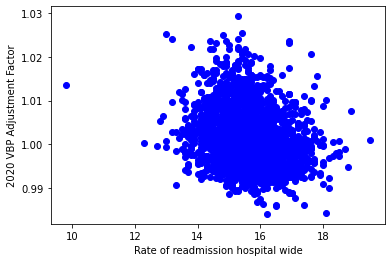

In [13]:
plt.scatter(x, y, c = "b")
plt.xlabel("Rate of readmission hospital wide")
plt.ylabel("2020 VBP Adjustment Factor")